<a href="https://colab.research.google.com/github/FabiBarbos/Churn/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df = pd.read_csv('Dataset_teste_Just_BI.csv',sep=';')

In [230]:
print(df.head())

   customer_id customer_acquisition_channel  year week  net_revenue  \
0       206461               Paid Marketing  2014  W09           71   
1       462640               Paid Marketing  2015  W25           28   
2       666461                     Referral  2015  W50           40   
3       183202                     Referral  2013  W42           18   
4       410993                     Referral  2014  W29            0   

   gross_revenue  boxes  
0             71      2  
1             56      1  
2             40      1  
3             37      1  
4             37      1  


In [231]:
num_linhas_df = len(df)
print(num_linhas_df)

715875


In [232]:
print(df.isnull().any())

customer_id                     False
customer_acquisition_channel    False
year                            False
week                            False
net_revenue                     False
gross_revenue                   False
boxes                           False
dtype: bool


In [233]:
print(df.isnull().sum())

customer_id                     0
customer_acquisition_channel    0
year                            0
week                            0
net_revenue                     0
gross_revenue                   0
boxes                           0
dtype: int64


In [234]:
print(df.dtypes)

customer_id                      int64
customer_acquisition_channel    object
year                             int64
week                            object
net_revenue                      int64
gross_revenue                    int64
boxes                            int64
dtype: object


In [235]:
results = df.groupby('year').agg({'gross_revenue': 'sum', 'net_revenue': 'sum', 'boxes': 'sum'})

In [236]:
print(results)

      gross_revenue  net_revenue   boxes
year                                    
2013        6134328      5295828  156289
2014       11505225     10161460  291647
2015       12019567     10611613  292778


In [237]:
results = df.groupby('year').agg({'gross_revenue': 'sum', 'net_revenue': 'sum', 'boxes': 'sum'}).reset_index()

In [238]:
results.head()

,year,gross_revenue,net_revenue,boxes
0,2013,6134328,5295828,156289
1,2014,11505225,10161460,291647
2,2015,12019567,10611613,292778


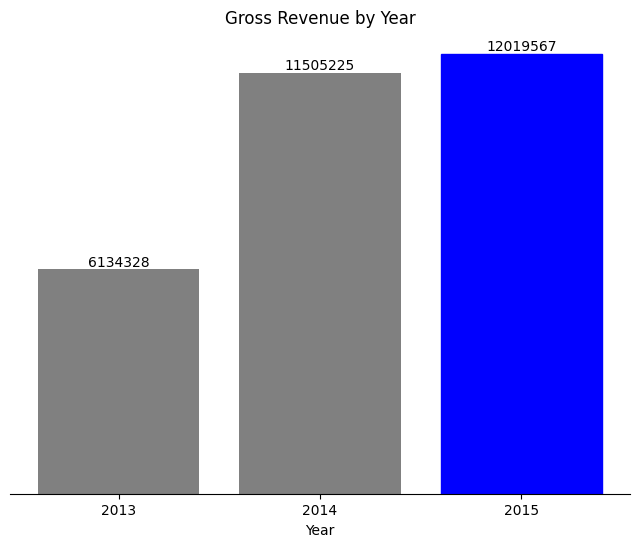

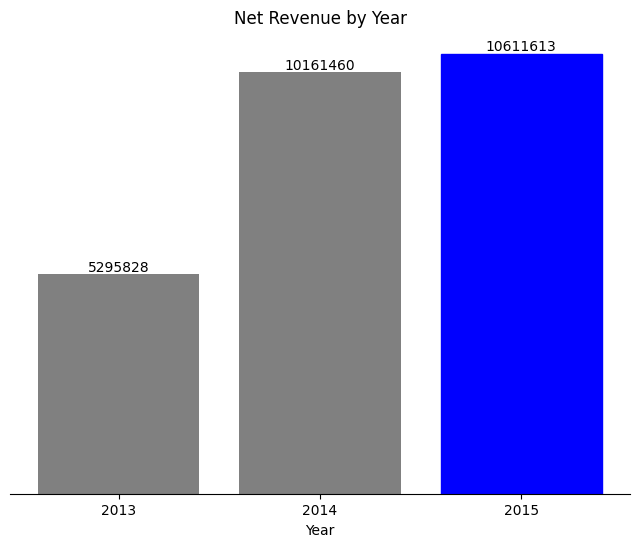

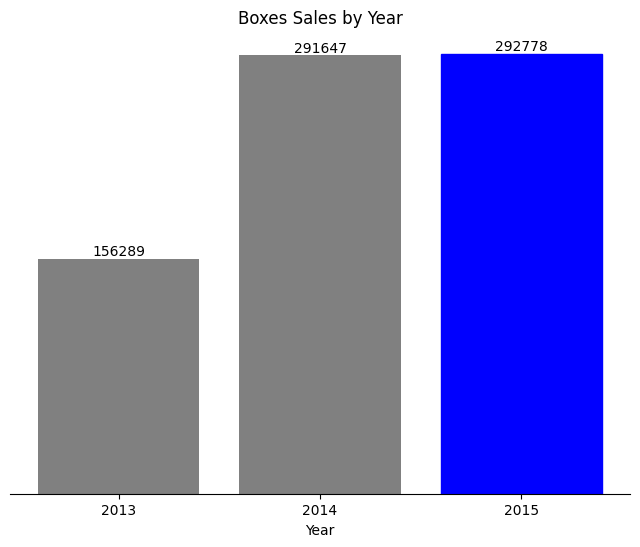

In [239]:
# Dados
years = [2013, 2014, 2015]
metrics = ['gross_revenue', 'net_revenue', 'boxes']
labels = ['Gross Revenue', 'Net Revenue', 'Boxes Sales']

# Criar um gráfico separado para cada métrica
for metric, label in zip(metrics, labels):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(years)), results[metric], color='grey')
    bars[-1].set_color('blue')
    plt.xticks(range(len(years)), years)  # Definir os anos como os rótulos no eixo x
    plt.xlabel('Year')
    plt.title(f'{label} by Year')
    plt.yticks([])

    # Adicionar os valores no topo das barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 str(int(height)), ha='center', va='bottom')

    # Remover bordas superior, direita e esquerda
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)             

    plt.show()

In [240]:
# Agrupar os dados por "year" e "customer_acquisition_channel" e calcular as somas
grouped_year_channel = df.groupby(['year', 'customer_acquisition_channel']).agg({
    'net_revenue': 'sum',
    'gross_revenue': 'sum',
    'boxes': 'sum'
}).reset_index()

In [241]:
grouped_year_channel.head()

,year,customer_acquisition_channel,net_revenue,gross_revenue,boxes
0,2013,Paid Marketing,4489272,5103819,129679
1,2013,Referral,806556,1030509,26610
2,2014,Paid Marketing,8440431,9385996,237085
3,2014,Referral,1721029,2119229,54562
4,2015,Paid Marketing,8169031,9023314,218626


In [242]:
def generate_line_plots(data, metrics):
    for metric in metrics:
        # Filtrar o DataFrame para a métrica atual
        metric_data = data[['year', 'customer_acquisition_channel', metric]]

        # Plotar gráfico de linhas usando o Seaborn
        plt.figure(figsize=(8, 6))
        ax = sns.lineplot(data=metric_data, x='year', y=metric, hue='customer_acquisition_channel', marker='o')

        # Eliminando as bordas de cima, da direita e esquerda
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
       
        # Adicionar os valores da métrica junto às linhas
        for year, channel, value in metric_data.values:
            plt.text(year, value, str(value), ha='center', va='bottom')

        plt.xlabel('Year')
        plt.ylabel(metric)
        plt.title('Total {} by Customer Acquisition Channel for Each Year'.format(metric))
        plt.legend()
        plt.tight_layout()
        plt.ylabel('')  # Remover o rótulo do eixo y

        # Remover o eixo y
        ax.set_yticks([])

        # Ajustar os rótulos do eixo x
        years = metric_data['year'].unique()
        plt.xticks(years, [int(year) for year in years])

        plt.show()

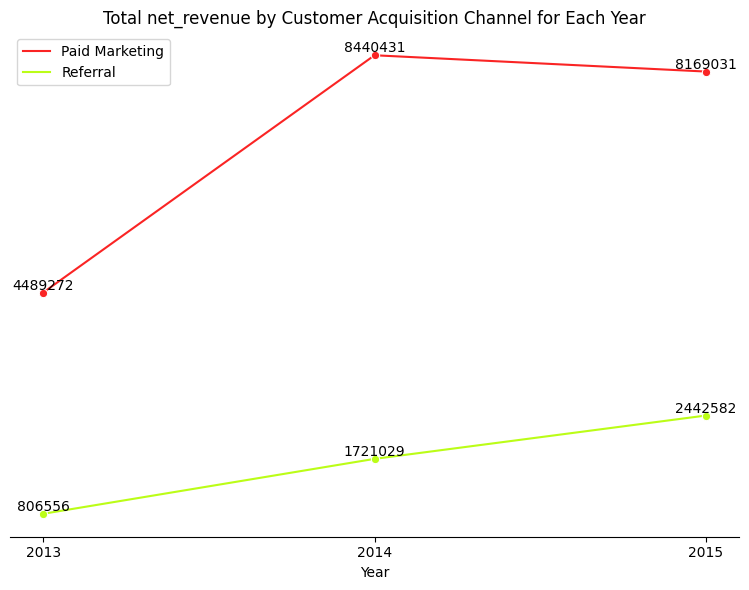

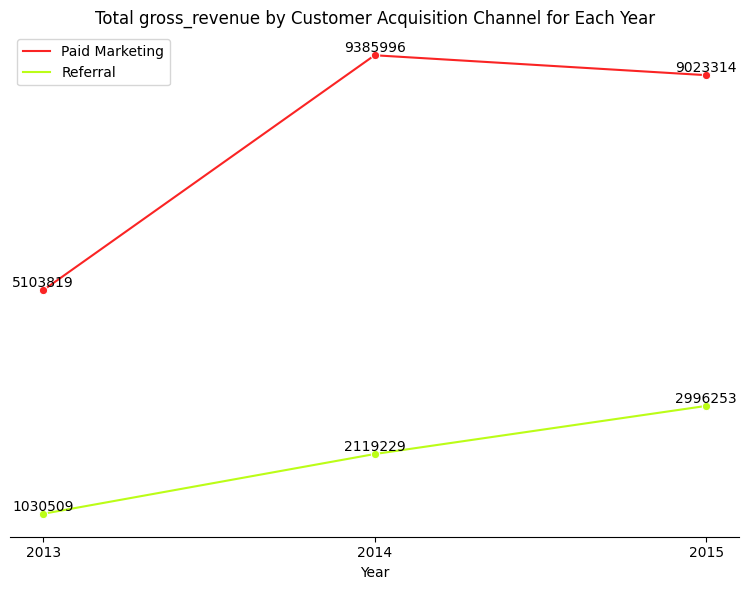

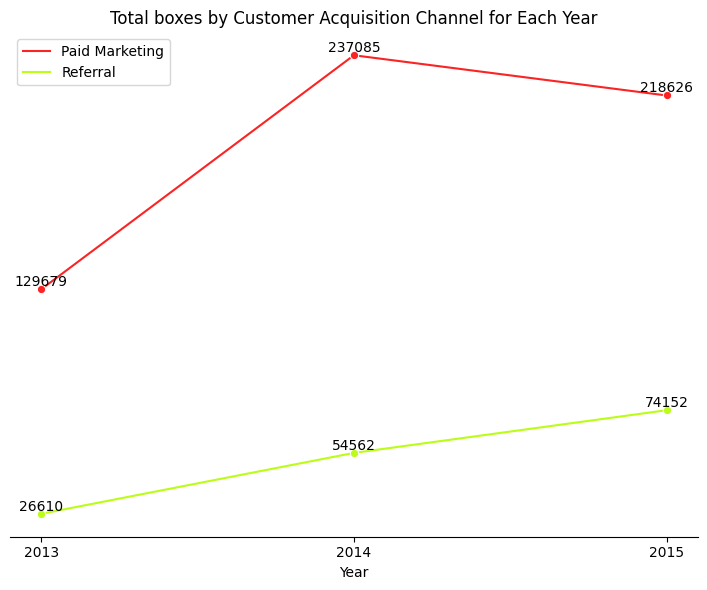

In [243]:
generate_line_plots(grouped_year_channel, ['net_revenue', 'gross_revenue', 'boxes'])

In [244]:
grouped_year_channel['Ticket_Medio'] = grouped_year_channel['gross_revenue'] / grouped_year_channel['boxes']

In [245]:
# Filtrar dados para 2013 e 2015
grouped_year_channel_2013 = grouped_year_channel[grouped_year_channel['year'] == 2013]
grouped_year_channel_2015 = grouped_year_channel[grouped_year_channel['year'] == 2015]

In [246]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2013
channel_2013_teste = grouped_year_channel_2013.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [247]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2015
channel_2015_teste = grouped_year_channel_2015.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [248]:
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2013:", channel_2013_teste)
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2015:", channel_2015_teste)

Canal de Aquisição de Clientes com maior Ticket Médio em 2013: Paid Marketing
Canal de Aquisição de Clientes com maior Ticket Médio em 2015: Paid Marketing


In [249]:
# Calcular o Ticket Médio
df['Ticket_Medio'] = df['gross_revenue'] / df['boxes']

In [250]:
# Filtrar dados para 2013 e 2015
df_2013 = df[df['year'] == 2013]
df_2015 = df[df['year'] == 2015]

In [251]:
num_linhas_df_2013 = len(df_2013)
print(num_linhas_df_2013)

147177


In [252]:
num_linhas_df_2015 = len(df_2015)
print(num_linhas_df_2015)

288204


In [253]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2013
channel_2013 = df_2013.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [254]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2015
channel_2015 = df_2015.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [255]:
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2013:", channel_2013)
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2015:", channel_2015)

Canal de Aquisição de Clientes com maior Ticket Médio em 2013: Paid Marketing
Canal de Aquisição de Clientes com maior Ticket Médio em 2015: Paid Marketing


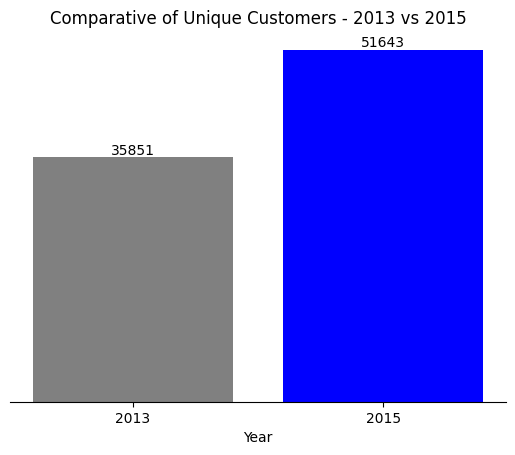

In [256]:
# Obter o número de clientes únicos por ano
clientes_unicos_2013 = df_2013['customer_id'].nunique()
clientes_unicos_2015 = df_2015['customer_id'].nunique()

# Criar o gráfico de barras comparativo
anos = ['2013', '2015']
clientes_unicos = [clientes_unicos_2013, clientes_unicos_2015]

# Definir as cores das barras
cores = ['grey', 'blue']

fig, ax = plt.subplots()

bar = ax.bar(anos, clientes_unicos, color=cores)
plt.xlabel('Year')
plt.title('Comparative of Unique Customers - 2013 vs 2015')

# Remover os valores do eixo y
plt.yticks([])

# Adicionar o valor no topo de cada barra
for i, v in enumerate(clientes_unicos):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Remover bordas superior, direita e esquerda
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)    

# Exibir o gráfico
plt.show()

Para incrementar as análises em relação a resultados de vendas e análises sobre os clientes, alguns dados complementares que podem ser importantes incluem:

Dados Demográficos dos Clientes: Informações como idade, gênero, localização geográfica, nível de renda e estado civil dos clientes podem ajudar a segmentar e entender melhor o perfil dos consumidores. Isso pode ser útil para direcionar estratégias de marketing e oferecer produtos e serviços mais adequados às diferentes necessidades dos clientes.

Dados de Comportamento do Cliente: Coletar informações sobre o comportamento dos clientes, como histórico de compras, frequência de compra, produtos mais comprados, canais de compra preferidos e hábitos de consumo, pode fornecer insights valiosos para personalizar ofertas, melhorar a experiência do cliente e identificar oportunidades de venda cruzada ou venda adicional.

Dados de Satisfação do Cliente: Medir a satisfação do cliente por meio de pesquisas ou avaliações pós-compra pode fornecer informações sobre a qualidade do produto, atendimento ao cliente e experiência geral de compra. Esses dados ajudam a identificar pontos fortes e fracos do negócio, bem como áreas que podem precisar de melhoria.

Dados de Campanhas de Marketing: Ao acompanhar e analisar dados de campanhas de marketing, como taxas de abertura de e-mails, cliques em anúncios, conversões e retorno sobre o investimento (ROI), é possível avaliar a eficácia das estratégias de marketing e ajustá-las conforme necessário.

Dados de Preços e Promoções: Acompanhar os dados de preços e promoções, como descontos oferecidos, datas de promoção, impacto nas vendas e preferências dos clientes, pode ajudar a otimizar a estratégia de precificação e promocional, maximizando os resultados de vendas.

Dados de Feedback dos Clientes: Ouvir o feedback direto dos clientes por meio de canais de comunicação, como atendimento ao cliente, redes sociais ou avaliações online, pode fornecer insights valiosos sobre a satisfação do cliente, problemas enfrentados e oportunidades de melhoria.

Esses são apenas alguns exemplos de dados complementares que podem enriquecer as análises de vendas e análises sobre os clientes. A escolha dos dados depende das necessidades e objetivos específicos da empresa, além da disponibilidade e capacidade de coleta dos dados.

In [257]:
# Filtrar os dados necessários
df_week_a_week = df[['year', 'week', 'customer_acquisition_channel','gross_revenue', 'net_revenue', 'boxes']]
df_week_a_week = pd.get_dummies(df_week_a_week, columns=['week'])

In [258]:
num_linhas_df_week_a_week = len(df_week_a_week)
print(num_linhas_df_week_a_week)

715875


In [259]:
df_week_a_week.head(10)

,year,customer_acquisition_channel,gross_revenue,net_revenue,boxes,week_W01,week_W02,week_W03,week_W04,week_W05,...,week_W44,week_W45,week_W46,week_W47,week_W48,week_W49,week_W50,week_W51,week_W52,week_W53
0,2014,Paid Marketing,71,71,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,Paid Marketing,56,28,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,Referral,40,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2013,Referral,37,18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,Referral,37,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2014,Referral,37,23,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2014,Referral,37,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2015,Paid Marketing,84,84,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2013,Paid Marketing,37,37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,2014,Referral,37,37,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
# Função para calcular o net revenue por semana
def calcular_net_revenue_por_semana(df):
    # Selecionar apenas as colunas de semana (week)
    colunas_semana = [coluna for coluna in df.columns if coluna.startswith('week_')]

    # Criar um dicionário para armazenar a soma do net revenue por semana
    soma_net_revenue_semana = {}

    # Calcular a soma do net revenue para cada coluna de semana
    for coluna in colunas_semana:
        soma_net_revenue_semana[coluna] = df['net_revenue'][df[coluna] == 1].sum()

    # Criar um DataFrame a partir do dicionário
    df_resultado = pd.DataFrame.from_dict(soma_net_revenue_semana, orient='index', columns=['Total_net_revenue'])
    df_resultado = df_resultado.reset_index()
    df_resultado.columns = ['week', 'Total_net_revenue']
    df_resultado['week'] = df_resultado['week'].str.replace('week_', '')
    return df_resultado

# Calcular o net revenue por semana para cada ano
df_resultado_net_revenue_2013 = calcular_net_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2013])
df_resultado_net_revenue_2013 = df_resultado_net_revenue_2013.assign(year=pd.Series(["2013"] * len(df_resultado_net_revenue_2013)))
df_resultado_net_revenue_2014 = calcular_net_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2014])
df_resultado_net_revenue_2014 = df_resultado_net_revenue_2014.assign(year=pd.Series(["2014"] * len(df_resultado_net_revenue_2014)))
df_resultado_net_revenue_2015 = calcular_net_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2015])
df_resultado_net_revenue_2015 = df_resultado_net_revenue_2015.assign(year=pd.Series(["2015"] * len(df_resultado_net_revenue_2015)))


In [261]:
# Juntar os três dataframes Total net revenue
df_resultado_net_revenue = pd.concat([df_resultado_net_revenue_2013, df_resultado_net_revenue_2014, df_resultado_net_revenue_2015])
df_resultado_net_revenue.head()

,week,Total_net_revenue,year
0,W01,0,2013
1,W02,2310,2013
2,W03,12342,2013
3,W04,25807,2013
4,W05,35713,2013


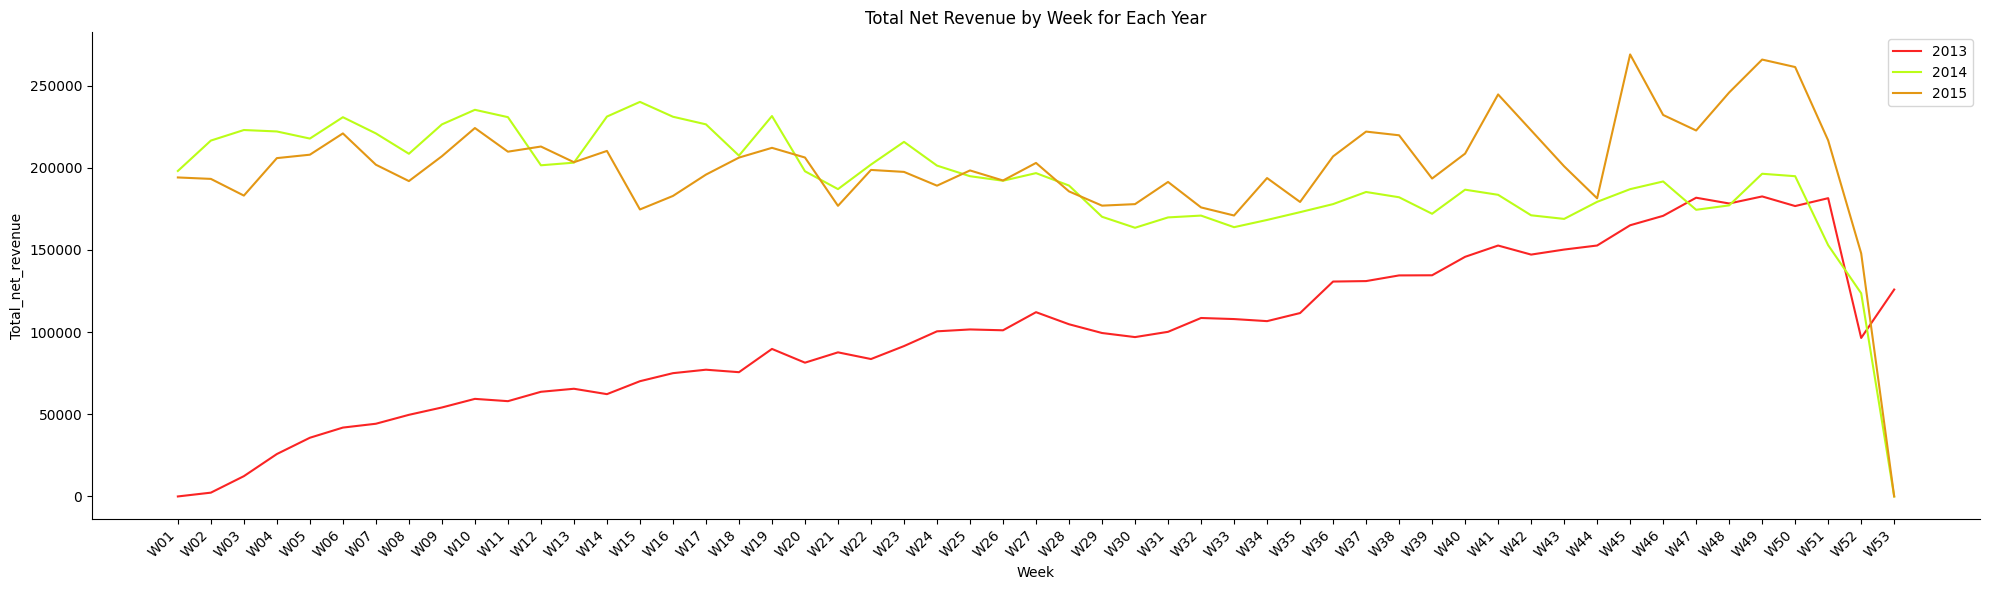

In [262]:
# Plotar gráfico de linhas
plt.figure(figsize=(20, 6))
for year in df_resultado_net_revenue['year'].unique():
    df_year = df_resultado_net_revenue[df_resultado_net_revenue['year'] == year]
    plt.plot(df_year['week'], df_year['Total_net_revenue'], label=str(year))

plt.xlabel('Week')
plt.ylabel('Total_net_revenue')
plt.title('Total Net Revenue by Week for Each Year')
# Ajustar espaçamento e orientação dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
      
plt.legend()
plt.tight_layout()
plt.show()

In [263]:
# Função para calcular o gross revenue por semana
def calcular_gross_revenue_por_semana(df):
    # Selecionar apenas as colunas de semana (week)
    colunas_semana = [coluna for coluna in df.columns if coluna.startswith('week_')]

    # Criar um dicionário para armazenar a soma do gross revenue por semana
    soma_gross_revenue_semana = {}

    # Calcular a soma do net revenue para cada coluna de semana
    for coluna in colunas_semana:
        soma_gross_revenue_semana[coluna] = df['gross_revenue'][df[coluna] == 1].sum()

    # Criar um DataFrame a partir do dicionário
    df_resultado = pd.DataFrame.from_dict(soma_gross_revenue_semana, orient='index', columns=['Total_gross_revenue'])
    df_resultado = df_resultado.reset_index()
    df_resultado.columns = ['week', 'Total_gross_revenue']
    df_resultado['week'] = df_resultado['week'].str.replace('week_', '')
    return df_resultado

# Calcular o net revenue por semana para cada ano
df_resultado_gross_revenue_2013 = calcular_gross_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2013])
df_resultado_gross_revenue_2013 = df_resultado_gross_revenue_2013.assign(year=pd.Series(["2013"] * len(df_resultado_gross_revenue_2013)))
df_resultado_gross_revenue_2014 = calcular_gross_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2014])
df_resultado_gross_revenue_2014 = df_resultado_gross_revenue_2014.assign(year=pd.Series(["2014"] * len(df_resultado_gross_revenue_2014)))
df_resultado_gross_revenue_2015 = calcular_gross_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2015])
df_resultado_gross_revenue_2015 = df_resultado_gross_revenue_2015.assign(year=pd.Series(["2015"] * len(df_resultado_gross_revenue_2015)))

In [264]:
# Juntar os três dataframes Total gross revenue
df_resultado_gross_revenue = pd.concat([df_resultado_gross_revenue_2013, df_resultado_gross_revenue_2014, df_resultado_gross_revenue_2015])
df_resultado_gross_revenue.head()

,week,Total_gross_revenue,year
0,W01,0,2013
1,W02,4047,2013
2,W03,20296,2013
3,W04,35253,2013
4,W05,44641,2013


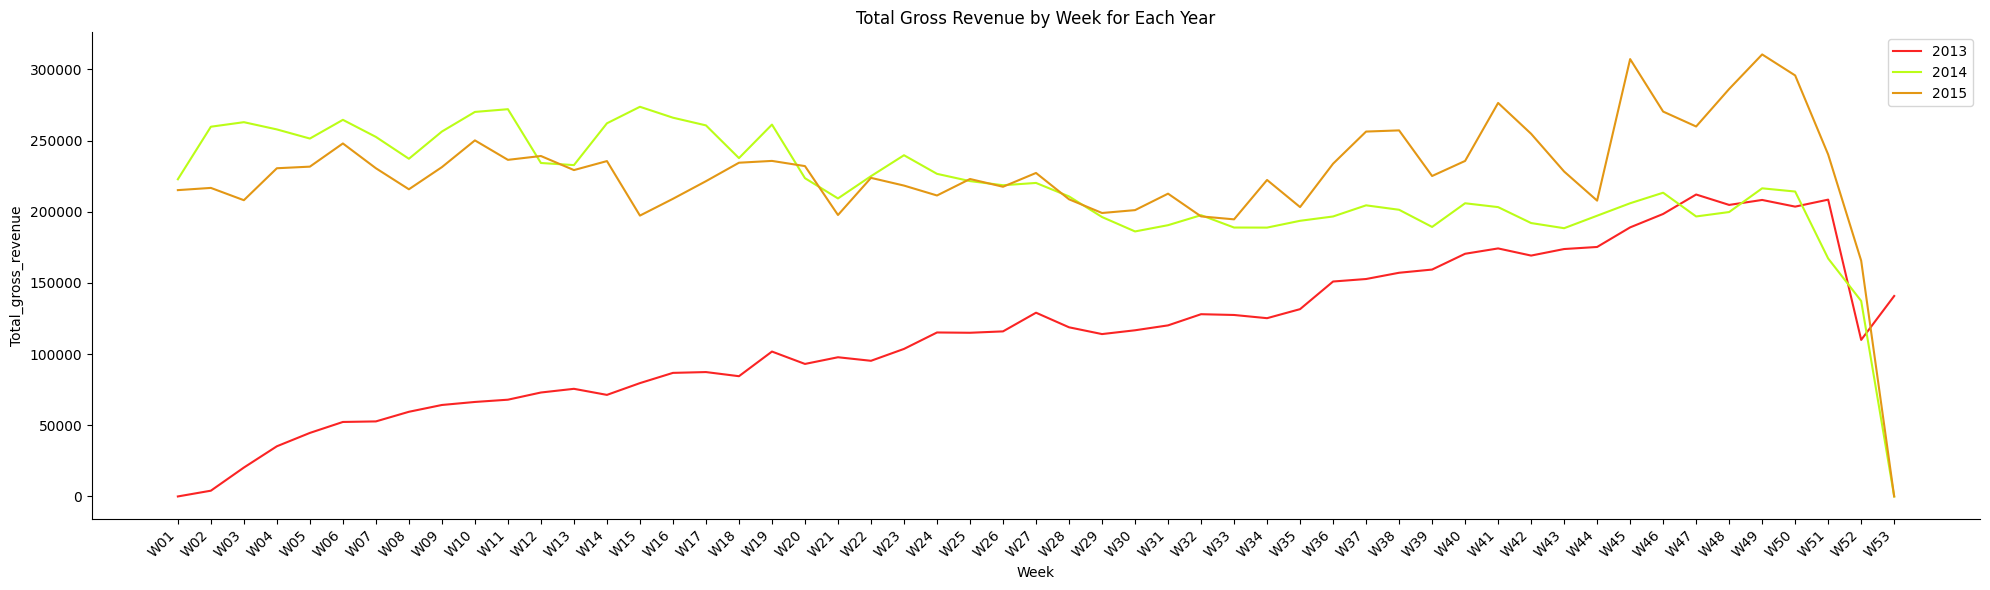

In [265]:
# Plotar gráfico de linhas
plt.figure(figsize=(20, 6))
for year in df_resultado_gross_revenue['year'].unique():
    df_year = df_resultado_gross_revenue[df_resultado_gross_revenue['year'] == year]
    plt.plot(df_year['week'], df_year['Total_gross_revenue'], label=str(year))

plt.xlabel('Week')
plt.ylabel('Total_gross_revenue')
plt.title('Total Gross Revenue by Week for Each Year')
# Ajustar espaçamento e orientação dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.show()

In [266]:
# Função para calcular boxes por semana
def calcular_boxes_por_semana(df):
    # Selecionar apenas as colunas de semana (week)
    colunas_semana = [coluna for coluna in df.columns if coluna.startswith('week_')]

    # Criar um dicionário para armazenar a soma de boxes por semana
    soma_boxes_semana = {}

    # Calcular a soma de boxes para cada coluna de semana
    for coluna in colunas_semana:
        soma_boxes_semana[coluna] = df['boxes'][df[coluna] == 1].sum()

    # Criar um DataFrame a partir do dicionário
    df_resultado = pd.DataFrame.from_dict(soma_boxes_semana, orient='index', columns=['Total_boxes'])
    df_resultado = df_resultado.reset_index()
    df_resultado.columns = ['week', 'Total_boxes']
    df_resultado['week'] = df_resultado['week'].str.replace('week_', '')
    return df_resultado

# Calcular o net revenue por semana para cada ano
df_resultado_boxes_2013 = calcular_boxes_por_semana(df_week_a_week[df_week_a_week['year'] == 2013])
df_resultado_boxes_2013 = df_resultado_boxes_2013.assign(year=pd.Series(["2013"] * len(df_resultado_boxes_2013)))
df_resultado_boxes_2014 = calcular_boxes_por_semana(df_week_a_week[df_week_a_week['year'] == 2014])
df_resultado_boxes_2014 = df_resultado_boxes_2014.assign(year=pd.Series(["2014"] * len(df_resultado_boxes_2014)))
df_resultado_boxes_2015 = calcular_boxes_por_semana(df_week_a_week[df_week_a_week['year'] == 2015])
df_resultado_boxes_2015 = df_resultado_boxes_2015.assign(year=pd.Series(["2015"] * len(df_resultado_boxes_2015)))

In [267]:
# Juntar os três dataframes Total boxes
df_resultado_boxes = pd.concat([df_resultado_boxes_2013, df_resultado_boxes_2014, df_resultado_boxes_2015])
df_resultado_boxes.head(20)

,week,Total_boxes,year
0,W01,0,2013
1,W02,100,2013
2,W03,526,2013
3,W04,929,2013
4,W05,1177,2013
5,W06,1361,2013
6,W07,1363,2013
7,W08,1535,2013
8,W09,1659,2013
9,W10,1707,2013


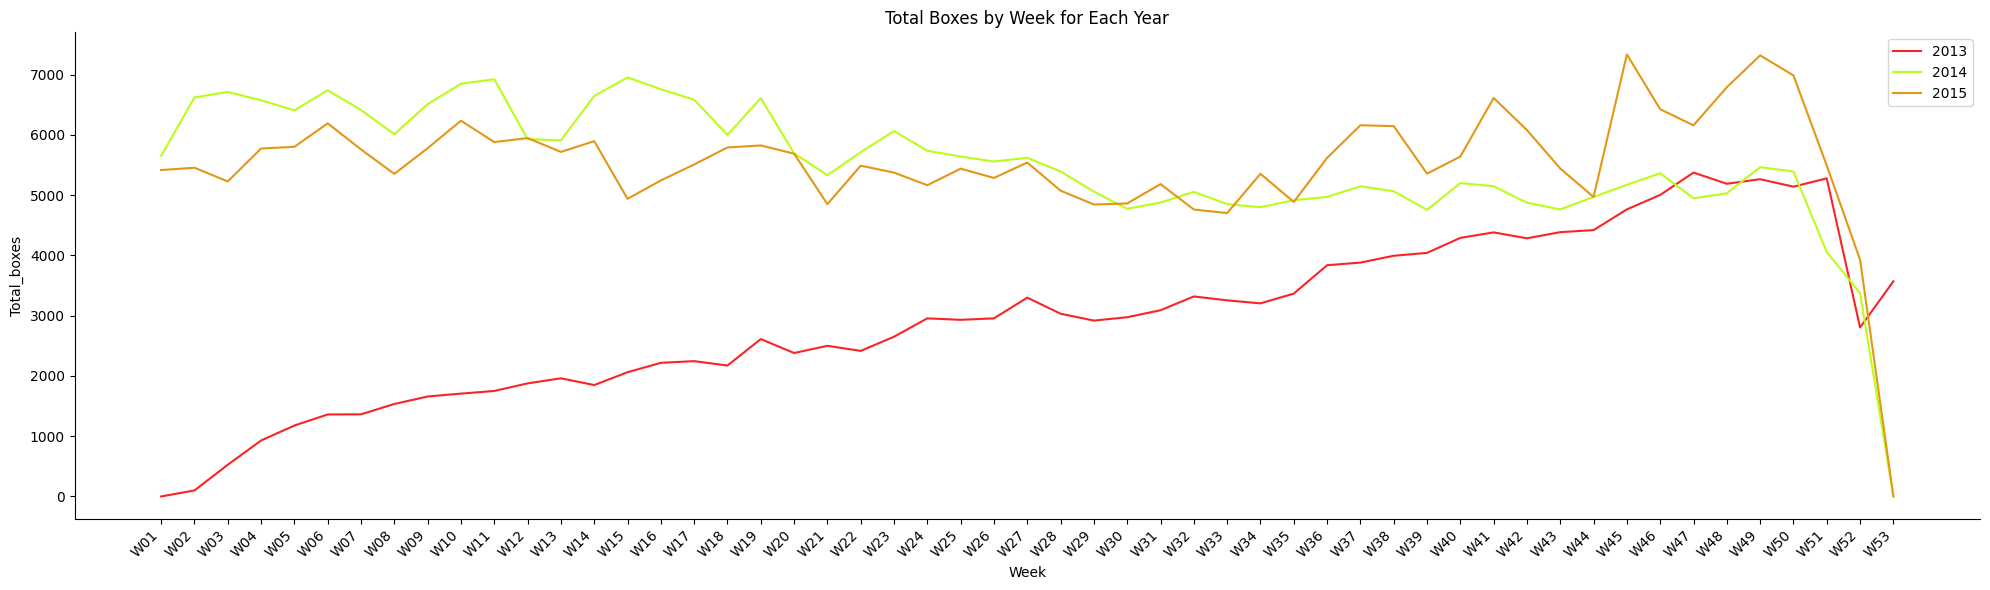

In [268]:
# Plotar gráfico de linhas

plt.figure(figsize=(20, 6))
for year in df_resultado_boxes['year'].unique():
    df_year = df_resultado_boxes[df_resultado_boxes['year'] == year]
    plt.plot(df_year['week'], df_year['Total_boxes'], label=str(year))

plt.xlabel('Week')
plt.ylabel('Total_boxes')
plt.title('Total Boxes by Week for Each Year')
# Ajustar espaçamento e orientação dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.show()

In [269]:
# Mesclar os DataFrames com base nas colunas "week" e "year"
df_merged = pd.merge(df_resultado_boxes, df_resultado_gross_revenue, on=['week', 'year'])
df_merged = pd.merge(df_merged, df_resultado_net_revenue, on=['week', 'year'])

# Visualizar o DataFrame resultante
print(df_merged)

    week  Total_boxes  year  Total_gross_revenue  Total_net_revenue
0    W01            0  2013                    0                  0
1    W02          100  2013                 4047               2310
2    W03          526  2013                20296              12342
3    W04          929  2013                35253              25807
4    W05         1177  2013                44641              35713
..   ...          ...   ...                  ...                ...
154  W49         7321  2015               310562             265797
155  W50         6988  2015               295797             261247
156  W51         5492  2015               240226             216590
157  W52         3929  2015               165642             147896
158  W53            0  2015                    0                  0

[159 rows x 5 columns]


In [270]:
# Mapear as semanas para os meses correspondentes
month_mapping = {
    'W01': 'Jan',
    'W02': 'Jan',
    'W03': 'Jan',
    'W04': 'Jan',
    'W05': 'Feb',
    'W06': 'Feb',
    'W07': 'Feb',
    'W08': 'Feb',
    'W09': 'Mar',
    'W10': 'Mar',
    'W11': 'Mar',
    'W12': 'Mar',
    'W13': 'Apr',
    'W14': 'Apr',
    'W15': 'Apr',
    'W16': 'Apr',
    'W17': 'May',
    'W18': 'May',
    'W19': 'May',
    'W20': 'May',
    'W21': 'Jun',
    'W22': 'Jun',
    'W23': 'Jun',
    'W24': 'Jun',
    'W25': 'Jul',
    'W26': 'Jul',
    'W27': 'Jul',
    'W28': 'Jul',
    'W29': 'Aug',
    'W30': 'Aug',
    'W31': 'Aug',
    'W32': 'Aug',
    'W33': 'Sep',
    'W34': 'Sep',
    'W35': 'Sep',
    'W36': 'Sep',
    'W37': 'Oct',
    'W38': 'Oct',
    'W39': 'Oct',
    'W40': 'Oct',
    'W41': 'Nov',
    'W42': 'Nov',
    'W43': 'Nov',
    'W44': 'Nov',
    'W45': 'Dec',
    'W46': 'Dec',
    'W47': 'Dec',
    'W48': 'Dec',
    'W49': 'Dec',
    'W50': 'Dec',
    'W51': 'Dec',
    'W52': 'Dec'
}

df_merged['month'] = df_merged['week'].map(month_mapping)

# Agrupar os dados por ano, mês e calcular a soma dos boxes
result_data = df_merged.groupby(['year', 'month']).agg({'Total_boxes': 'sum','Total_gross_revenue': 'sum','Total_net_revenue': 'sum'}).reset_index()

# Visualizar o DataFrame resultante
print(result_data)

    year month  Total_boxes  Total_gross_revenue  Total_net_revenue
0   2013   Apr         8090               313432             272878
1   2013   Aug        12305               479073             405117
2   2013   Dec        38829              1534985            1332791
3   2013   Feb         5436               209183             171503
4   2013   Jan         1555                59596              40459
5   2013   Jul        12221               478931             419569
6   2013   Jun        10523               411981             363215
7   2013   Mar         6994               271669             235141
8   2013   May         9412               366785             323849
9   2013   Nov        17476               692622             602673
10  2013   Oct        16212               639860             545855
11  2013   Sep        13665               535370             456902
12  2014   Apr        26271              1034875             905259
13  2014   Aug        19769               770733

In [271]:
# Definir a ordem dos meses
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Criar uma coluna com a ordem numérica dos meses
result_data['month_order'] = pd.Categorical(result_data['month'], categories=month_order, ordered=True).codes

# Ordenar o DataFrame pelos anos e pela ordem numérica dos meses
df_merged_sorted = result_data.sort_values(by=['year', 'month_order'])

# Remover a coluna de ordem numérica dos meses
df_merged_sorted = df_merged_sorted.drop('month_order', axis=1)

In [272]:
df_merged_sorted.head()

,year,month,Total_boxes,Total_gross_revenue,Total_net_revenue
4,2013,Jan,1555,59596,40459
3,2013,Feb,5436,209183,171503
7,2013,Mar,6994,271669,235141
0,2013,Apr,8090,313432,272878
8,2013,May,9412,366785,323849


In [273]:
df_merged_sorted['month_year'] = df_merged_sorted['month'] + '/' + df_merged_sorted['year'].astype(int).astype(str)

In [274]:
df_merged_sorted.head()

,year,month,Total_boxes,Total_gross_revenue,Total_net_revenue,month_year
4,2013,Jan,1555,59596,40459,Jan/2013
3,2013,Feb,5436,209183,171503,Feb/2013
7,2013,Mar,6994,271669,235141,Mar/2013
0,2013,Apr,8090,313432,272878,Apr/2013
8,2013,May,9412,366785,323849,May/2013


In [275]:
# Criar novo dataframe com as colunas desejadas
df_new_meses = df_merged_sorted[['month_year', 'Total_net_revenue']]

In [276]:
num_linhas_df_new_meses = len(df_new_meses)
print(num_linhas_df_new_meses)

36


In [277]:
# Separar o dataframe em dois conjuntos
df_treino = df_new_meses.loc[df_new_meses['month_year'] <= 'Dec/2013']
df_teste = df_new_meses.loc[df_new_meses['month_year'] > 'Dec/2013']

print(df_treino.shape,"\n")
print(df_teste.shape,"\n")

(7, 2) 

(29, 2) 



In [278]:
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,Ticket_Medio
0,206461,Paid Marketing,2014,W09,71,71,2,35.5
1,462640,Paid Marketing,2015,W25,28,56,1,56.0
2,666461,Referral,2015,W50,40,40,1,40.0
3,183202,Referral,2013,W42,18,37,1,37.0
4,410993,Referral,2014,W29,0,37,1,37.0


In [279]:
df['week_year'] = df['week'] + '/' + df['year'].astype(int).astype(str)

In [280]:
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,Ticket_Medio,week_year
0,206461,Paid Marketing,2014,W09,71,71,2,35.5,W09/2014
1,462640,Paid Marketing,2015,W25,28,56,1,56.0,W25/2015
2,666461,Referral,2015,W50,40,40,1,40.0,W50/2015
3,183202,Referral,2013,W42,18,37,1,37.0,W42/2013
4,410993,Referral,2014,W29,0,37,1,37.0,W29/2014


In [281]:
# Criar novo dataframe com as colunas desejadas
df_new = df[['week_year', 'net_revenue']]


In [282]:
# definindo a week_year como índice
df_new = df_new.set_index('week_year').sort_index()

In [283]:
df_new.head()

,net_revenue
week_year,
W01/2014,18
W01/2014,37
W01/2014,116
W01/2014,37
W01/2014,37


In [284]:
num_linhas_df_new = len(df_new)
print(num_linhas_df_new)

715875


In [285]:
train_data = df_new.loc[:'W52/2013']
test_data = df_new.loc['W53/2013':]

print(train_data.shape,"\n")
print(test_data.shape,"\n")

# Vamos ver se o arquivo termina em 2016 mesmo...
print(train_data.tail(2),"\n")

# E vamos ver se o arquivo começa em 2017 mesmo...
print(test_data.head(2))

(705395, 1) 

(3384, 1) 

           net_revenue
week_year             
W52/2013            14
W52/2013             0 

           net_revenue
week_year             
W53/2013            26
W53/2013            37


In [286]:
df_proximos_meses.head(6)

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as datas futuras
df_future = pd.DataFrame({'YearWeek': range(df_filtered['YearWeek'].max() + 1, df_filtered['YearWeek'].max() + 27)})

# Treinar o modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(df_filtered['YearWeek'].values.reshape(-1, 1), df_filtered['net_revenue'])

# Fazer a previsão para as datas futuras
df_future['Net Revenue'] = regression_model.predict(df_future['YearWeek'].values.reshape(-1, 1))

# Extrair o ano e semana das datas futuras
df_future['Year'] = df_future['YearWeek'] // 100
df_future['Week'] = 'W' + (df_future['YearWeek'] % 100).astype(str).str.zfill(2)

# Exibir a projeção de net_revenue para os próximos 6 meses
print(df_future[['Year', 'Week', 'Net Revenue']])

<div class="markdown-google-sans">
  <h1>Conheça o Colab</h1>
</div>

Se você já conhece bem o Colab, confira este vídeo para saber mais sobre as tabelas interativas, a visualização do histórico de código executado e o Palette de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  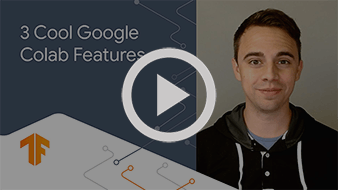
  </a>
</center>

<div class="markdown-google-sans">
  <h2>O que é o Colab?</h2>
</div>

O Colab, ou "Colaboratory", permite escrever e executar Python no navegador e conta com o seguinte: 
- Nenhuma configuração necessária
- Acesso a GPUs sem custo financeiro
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!

<div class="markdown-google-sans">

## <strong>Vamos começar</strong>
</div>

O documento que você está lendo não é uma página da Web estática, mas sim um ambiente interativo chamado <strong>notebook Colab</strong> que permite escrever e executar código.

Por exemplo, aqui está uma <strong>célula de código</strong> com um breve script Python que calcula um valor, armazena-o em uma variável e imprime o resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

Para executar o código na célula acima, clique nela e depois pressione o botão Play à esquerda do código ou use o atalho do teclado "Command/Ctrl+Enter". Para editar o código, basta clicar na célula e começar a editar.

As variáveis definidas em uma célula podem ser usadas mais tarde em outras células:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Os notebooks do Colab permitem combinar <strong>código executável</strong> e <strong>rich text</strong> em um só documento, além de <strong>imagens</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> e muito mais. Quando você cria seus próprios notebooks do Colab, eles são armazenados na sua conta do Google Drive. É possível compartilhar os notebooks do Colab facilmente com colegas de trabalho ou amigos e permitir que eles façam comentários ou até editem o documento. Para saber mais, consulte a <a href="/notebooks/basic_features_overview.ipynb">Visão Geral do Colab</a>. Para criar um novo notebook do Colab, use o menu Arquivo acima ou acesse o seguinte: <a href="http://colab.research.google.com#create=true">criar um novo notebook do Colab</a>.

Os notebooks do Colab são notebooks do Jupyter hospedados no Colab. Para saber mais sobre o projeto Jupyter, acesse <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciência de dados
</div>

Com o Colab, você pode aproveitar todo o potencial das conhecidas bibliotecas Python para analisar e ver dados. A célula de códigos abaixo usa <strong>numpy</strong> para gerar dados aleatórios e <strong>matplotlib</strong> para visualizá-los. Para editar o código, basta clicar na célula e começar a editar.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Começar a usar o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para ver notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

<div class="markdown-google-sans">

## Mais recursos

### Como trabalhar com Notebooks no Colab

</div>

- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Como trabalhar com dados
</div>

- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Começar a usar o BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de machine learning

<div>

Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
</div>

- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemplos em destaque

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: use o kit de ferramentas para IA conversacional do Nvidia NeMo para trocar uma voz em um fragmento de áudio por uma gerada por computador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.
